# Correlation, prediction, and linear functions

At least in the case of linear relationships, correlation is useful for measuring association.  But it is not so useful for *prediction*.  In particular, prediction usually requires two things: 
- a *predicted value* of the outcome ($Y$) for a given value of the inputs (the $X$s).  For example, we would like to know what product from our website someone is likely to buy ($Y$) who is, say, age 35 ($X_1$), of moderate income ($X_2$), in good health ($X_3$), with two children ($X_4$) etc. 
- some notion of the "effect" on the outcome of a *change* to the inputs.  For example, we would like to know what will happen to inflation ($Y$) if, say, unemployment rises by 1\% ($X$).

We will now explore a very basic predictor, the linear model, that does both. To motivate this model, we will consider a public health example of the relationship between cigarette tax levels (tax in dollars on a pack of 20 cigarettes, `cig_tax12`) and the proportion of a state's population that smokes (`smoking`).  Let's load the data and take a look at the relevant variables:

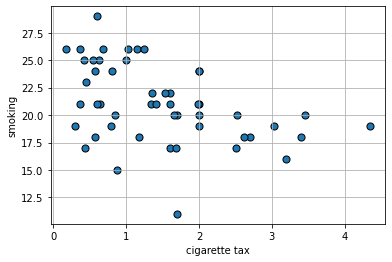

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
states_data = pd.read_csv("data/states_data.csv")

plt.scatter(states_data['cig_tax12'], 
            states_data['smokers12'], s=50, edgecolors="black") 
plt.xlabel("cigarette tax")
plt.ylabel("smoking")
plt.grid()
plt.show()

The plot suggests the relationship between $X$ and $Y$ is *negative*: when taxes are high, smoking is low (at the state level).  This belief is confirmed by the correlation: 

In [2]:
sub_smoke = states_data[["cig_tax12","smokers12"]]
sub_smoke.corr()

cig_tax12  smokers12
cig_tax12   1.000000  -0.431504
smokers12  -0.431504   1.000000

## Proposing a Linear Relationship

What is the nature of the relationship between $X$ and $Y$?  It is not completely *linear*, but for now, we will *assume* it is.  Indeed, a straight line of "best fit" from top left to bottom right would not seem wildly inappropriate here.  That is, a straight line would do a seemingly decent (but not perfect!) job of describing how these variables are related to each other.

We can formalize this idea by asserting that $Y$ depends on $X$ in the following way: 

$$
Y=\underbrace{a}_{\mbox{intercept}}+ (\underbrace{b}_{\mbox{slope}}\times X)
$$

or

$$
Y=a + bX
$$

We will call 
- $a$ the "intercept" (or the "constant").  It is the value that $Y$ takes when $X$ is zero.
- $b$ the "slope".  It is the effect of a *one* unit change in $X$ on $Y$.

This equation is equivalent to saying that $Y$ is a *linear function* of $X$.  Specifically here, the percentage of people in a state that smoke is a *linear function* of the tax on cigarettes in that state.

Notice: this is an *assertion* or an *assumption*: we have not "proved" the relationship is linear; we are saying that a linear relationship seems a reasonable approximation for the truth. We will see what that linear assumption would imply about the way that $X$ affects $Y$, and what our estimates (our predictions) of $Y$ would be. In this way, we will move beyond what correlation, alone, can do.

So, if you give me a value for $a$ and $b$, I will return to you a particular straight line that gives us what we want.  The question is: where do we get the values for $a$ and $b$?

## Recap: Linear Functions
Suppose that you are told two facts:
- when $x=1$, $y=6$
- when $x=2$, $y=8$

What is the relationship between $x$ and $y$?  Let's plot it: 

In [3]:
x = ([1,2])
y = ([6,8])
plt.xlim(-.5,4)
plt.ylim(-1,10)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.box(False)
plt.grid()
plt.scatter(x,y, zorder=2)
plt.show()

What is the *intercept*?  We can get a sense of that by drawing a line through both points, and seeing where it crosses the $y$ axis:

:::{figure-md} linear_slope_intercept
<img src="figures/linear_slope_intercept.png" alt="linear_slope_intercept" class="bg-white mb-1" width="400">

Drawing a line through both data points
:::

It looks like $y$ is 4 when $x$ is zero.  So the intercept is 4.

What is the *slope* of this function?  Well, it is $\frac{\mbox{rise}}{\mbox{run}}$; taken between the points, this is shown by the lines in black. In particular: $\frac{2}{1}$ because we move along 1 unit on the $x$ axis, and go up $2$ on the $y$-axis.  So that's 2.

To recap, we have: 

$$
y = a  + bx
$$

which is:

$$
y = \mbox{intercept} + \mbox{slope} \times x
$$

In our example, this is:

$$
6 = \mbox{4} + (\mbox{2} \times 1)
$$

and

$$
8 = \mbox{4} + (\mbox{2} \times 2)
$$

Obviously, this was not real data: these were just some numbers as an example.  But the general idea will now be the same: we will fit the "best" straight line to the data and thereby learn a value for $a$ and $b$.

## Modeling the mean of $Y$
In our math example above, $y$ took one value for a given value of $x$.  But in the real world, that won't generally be the case: for example, people of the same height ($x$) might vary somewhat in terms of their weights ($y$). And states with the same tax rate ($x$) might vary somewhat in terms of their smoking percentage ($y$). 

So we have to make a decision as to what exactly about $y$ we will try to model as a linear function of $x$.  Here "to model as" means, basically, "simplify the relationship as."

And for now, our interest will be in the *average* (that is, the mean) value that $y$ takes for a specific value of  $x$. And it is *this* average that we will make a linear function of $x$.  This is sometimes written as:

$$
\mathbb{E}(Y|X) = a + bX
$$

Here, $\mathbb{E}$ is called the "expectations operator" and it is telling us to take the "average of $Y$, *given* $X$".  That means, essentially, the "average of $Y$, taking into account how $X$ varies in the data". And the particular way we will do that "taking into account" is by making the average a *linear* function of $X$ via $a$ and $b$.

It is worth noting what this assumption *rules out*.  For example, it will rule out *non*-linear functions where, say, a change of one unit in $X$ at some points in the data has a different effect (on $Y$) relative to a change of one unit in $X$ at some other point in the data.

To see this, take a look at the next code snippet. It draws $y$ as a *linear* function of $x$ in blue.  And it draws $y$ as a *non*-linear function of $x$ in red (in particular, this is called a log function).  Notice that the slope of the linear function is constant---it doesn't matter where you calculate the rise over the run: it is always the same.  This is *not* true of the non-linear function: for example, the increase in $y$ as $x$ goes from 1 to 20 is *much* larger than the increase in $y$ as $x$ goes from 40 to 60.

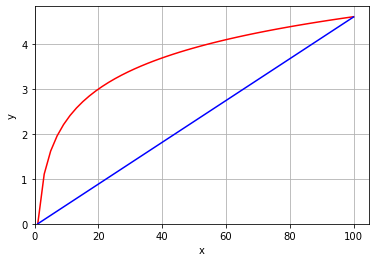

In [4]:
xnon = np.linspace(1,100)
ynon  = np.log(xnon)
plt.plot(xnon, ynon, color="red")

plt.plot( ([1,100]), ([0,4.6]), color="blue")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.grid()
plt.show()